# 4. Working with images

# FITS - Flexible Image Transport System
Let's say we'd like to save our months table. 
We'll use the FITS file format 
* released in 1981
* FITS is designed specifically for scientific data
* good for both tables and images
* you can still open files from 1981 -> backwards compatible

In [9]:
from astropy.io import fits
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data
head  = fits.open(name)[0].header

Who wrote it?

In [3]:
from astropy.io import fits
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data
head  = fits.open(name)[0].header
head

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                   44                                                  
NAXIS2  =                   44                                                  
EXTEND  =                    T / Tables following main image                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
BLOCKED =                    T / Tape may be blocked                            
OBJECT  = 'COSMOS_F'           / Source name                                    
TELESCOP= 'VLA     '        

What is an image?

Image is a collection of values for different $x$ and $y$ coordinates

In [4]:
from astropy.io import fits
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data
head  = fits.open(name)[0].header
image

array([[ -8.70451004e-06,  -7.03605656e-06,  -9.61110800e-06, ...,
         -2.11844035e-05,  -7.37752634e-06,   7.76577679e-07],
       [  4.06806839e-06,   8.79416348e-06,   6.58952240e-06, ...,
         -2.17131219e-05,  -2.04164917e-06,   8.11418522e-06],
       [  8.91225500e-06,   1.76336980e-05,   1.79761319e-05, ...,
         -1.59561550e-05,   4.33084642e-06,   1.55305715e-05],
       ..., 
       [  2.18399182e-05,   1.96641231e-05,   5.25467613e-06, ...,
          1.57720260e-05,   5.22840810e-06,   1.58473347e-06],
       [  6.44916599e-06,   5.88442708e-06,  -1.28183626e-06, ...,
          1.05489908e-05,   5.39193024e-07,  -2.78830476e-06],
       [ -8.53112851e-06,  -9.84953294e-06,  -1.01972282e-05, ...,
          7.38618610e-06,   1.27170281e-07,  -4.48623496e-06]], dtype=float32)

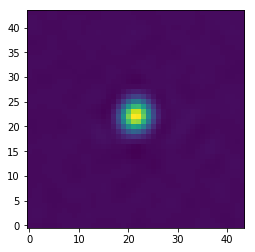

In [13]:
import matplotlib.pyplot as plt
from astropy.io import fits
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
image = fits.open(name)[0].data
head  = fits.open(name)[0].header
f, ax = plt.subplots(1, 1)
ax.imshow(image, origin='lower')
f

# What's on the axes?
# What are the values?

Let's add coordinates


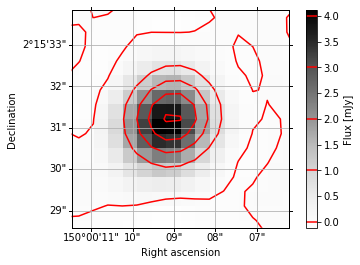

In [99]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.io import fits
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
HST   = '0001_150.00256000_2.25863000_acs_I_100005+0216_unrot_sci_20.fits'
image = 1000*fits.open(name)[0].data
HSTimage = fits.open(HST)[0].data
head  = fits.open(name)[0].header
HSThead = fits.open(HST)[0].header

wcs = WCS(head, naxis=2)
f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im= ax.imshow(image, origin='lower',cmap='Greys')
col = plt.colorbar(im)              # values are now in the colorbar
col.set_label('Flux [mJy]')
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')
ax.grid(True)
lines = ax.contour(image, colors='r', levels=[0, 1, 2, 3, 4],origin='lower')
ax.set_xlim(15,30)
ax.set_ylim(15,30)
col.add_lines(lines)

In [133]:
HSThead['PHOTFLAM'] # ergs/cm2/Ang/electron 
HSThead['PHOTPLAM'] # central λ in Ang

convJy = 3.34*10**(4)*HSThead['PHOTPLAM']**2*HSThead['PHOTFLAM']
convnJy = convJy/10**(-9)

(20, 23)

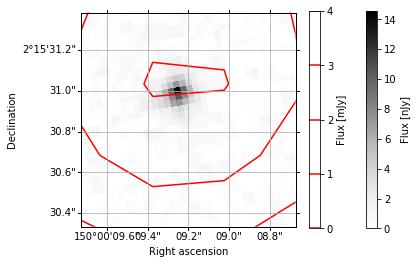

In [134]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.io import fits
name  = '0001_150.00256000_2.25863000_vla_20cm_lg_tan_10.fits'
HST   = '0001_150.00256000_2.25863000_acs_I_100005+0216_unrot_sci_20.fits'
image = 1000*fits.open(name)[0].data
HSTimage = convnJy*fits.open(HST)[0].data
head  = fits.open(name)[0].header
HSThead = fits.open(HST)[0].header

wcs = WCS(head, naxis=2)
wcsH = WCS(HSThead, naxis=2)
f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=wcs)
im= ax.imshow(HSTimage, vmin=0,cmap='Greys',transform=ax.get_transform(wcsH))
col = plt.colorbar(im)              
col.set_label('Flux [nJy]')
ax.set_xlabel('Right ascension')
ax.set_ylabel('Declination')
ax.grid(True)
lines = ax.contour(image, colors='r', levels=[0, 1, 2, 3, 4])
col2 = plt.colorbar(lines)
col2.set_label('Flux [mJy]')
ax.set_xlim(20,23)
ax.set_ylim(20,23)

In [156]:
#Root mean square noise
RMSim = image[image<2].flatten()
RMS = np.sqrt(np.average((RMSim-np.mean(RMSim))**2))
Limit = 5*RMS
Limit

0.82863733172416687

# Task 1
1. Find the mean value of the flux in the image using np.mean()
2. Find the minimum and maximum value of the flux
3. How many pixels have fluxes above 5 RMS?
4. What's the mean flux of that cutout?

# Solution

In [155]:
import numpy as np
print('Mean', np.mean(image))
print('Max', np.max(image))
print('Min', np.min(image))
print('Number of px', np.sum(image>Limit))
print('Mean flux [mJy]', np.mean(image[image>Limit]))
print('Total flux above 5 RMS [mJy]', np.sum(image[image>Limit]))

Mean 0.0523253
Max 4.10531
Min -0.11534
Number of px 40
Mean flux [mJy] 2.12552
Total flux above 5 RMS [mJy] 85.0208


# Homework
1. What's the difference between luminosity and flux?
2. Make a pandas table in the following way:
    1. Count how many pixels have fluxes are above 
    [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003]. That will be the first column
    2. Second column should be the mean flux for each of the cutouts
    3. Third column should be the number of pixels
3. Plot the number of pixels vs. the mean flux
4. Save the table to a fits file

# Notes
* For those who want to know a bit about fits files, see:
https://www.aanda.org/articles/aa/pdf/2001/34/aah2901.pdf
* If you're interested in the images, you can make new ones using: 
http://irsa.ipac.caltech.edu/data/COSMOS/index_cutouts.html

* Images are part of the COSMOS Survey, you can find more about it here:
    https://ui.adsabs.harvard.edu/#abs/2007ASPC..375..166S/abstract